# Analyse Employees Data of a Multi National Company

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [32]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Employees_Data.csv")

In [33]:
data.head()


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [7]:
data.columns

Index(['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Department', 'Job_Title',
       'Hire_Date', 'Location', 'Performance_Rating', 'Experience_Years',
       'Status', 'Work_Mode', 'Salary_INR'],
      dtype='object')

In [34]:
data.shape

(2000000, 12)

In [8]:
data.describe()

,Unnamed: 0,Performance_Rating,Experience_Years,Salary_INR
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.000148e+00,5.010287e+00,8.968878e+05
std,5.773504e+05,1.413973e+00,3.608823e+00,4.026103e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+05
25%,4.999998e+05,2.000000e+00,2.000000e+00,6.163460e+05
50%,9.999995e+05,3.000000e+00,5.000000e+00,8.110265e+05
75%,1.499999e+06,4.000000e+00,8.000000e+00,1.073745e+06
max,1.999999e+06,5.000000e+00,1.500000e+01,2.999976e+06


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


## data cleaning

In [ ]:
data.duplicated()

In [33]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isna().sum()

#### removing unwanted columns from data

In [35]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data

#### change the type of hire daate column to date instead of object

In [36]:
data['Hire_Date']=pd.to_datetime(data['Hire_Date'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Employee_ID         object        
 1   Full_Name           object        
 2   Department          object        
 3   Job_Title           object        
 4   Hire_Date           datetime64[ns]
 5   Location            object        
 6   Performance_Rating  int64         
 7   Experience_Years    int64         
 8   Status              object        
 9   Work_Mode           object        
 10  Salary_INR          int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 167.8+ MB


In [ ]:
data.select_dtypes(include='object')

In [ ]:
data.select_dtypes(include='number')

### exploring performance rating feature

In [18]:
data.Performance_Rating.value_counts()

Performance_Rating
4    400529
2    400174
3    399814
1    399756
5    399727
Name: count, dtype: int64

In [20]:
data.Performance_Rating.mean()

np.float64(3.0001485)

### exploring experience year feature

In [21]:
data.Experience_Years.nunique()

16

In [ ]:
data.Experience_Years.value_counts()

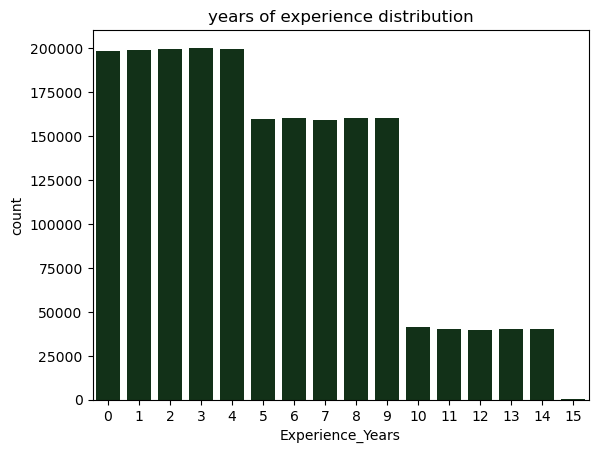

In [30]:
sns.countplot(x='Experience_Years',data=data,palette=['#0d3615'],hue='Experience_Years',legend=False)
plt.title('years of experience distribution')
plt.show()

# Business analysis questions

### what is the distributions of employees status

In [42]:
satust=data.Status.value_counts()

In [ ]:
satust

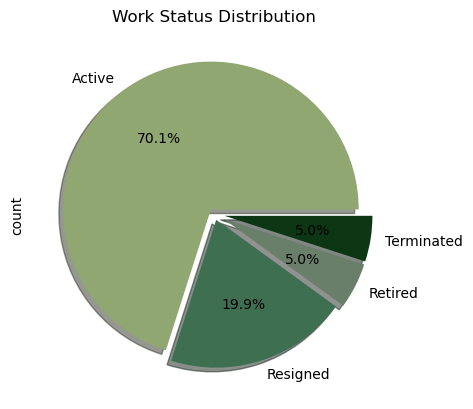

In [50]:
satust.plot(kind='pie',colors=["#91a772","#3e6f51","#697f69","#0d3615"],
explode=[.04,.04,.07,.07],autopct="%1.1f%%",shadow=True)
plt.title("Work Status Distribution")
plt.show()

### what is the distribution of work mode

In [51]:
work=data.Work_Mode.value_counts()

In [ ]:
work

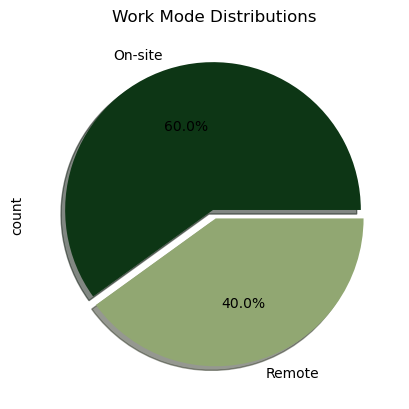

In [56]:
work.plot(kind='pie',colors=["#0d3615","#91a772"],autopct="%1.1f%%",
explode=[.03,.03],shadow=True)
plt.title("Work Mode Distributions")
plt.show()

### how many employees are there in each department

In [57]:
department=data.Department.value_counts()

In [ ]:
department

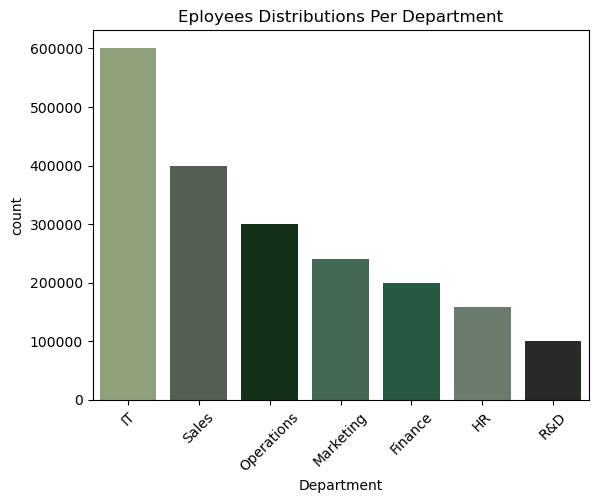

In [67]:
order=data.Department.value_counts().index
sns.countplot(x='Department',data=data,
palette=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'], 
hue='Department',order=order)
plt.title("Eployees Distributions Per Department")
plt.xticks(rotation=45)
plt.show()

### How Many Employees Asign To Each Job Title

In [38]:
job=data.Job_Title.value_counts()
orders=data.Job_Title.value_counts().index

In [ ]:
job

C:\Users\HP\AppData\Local\Temp\ipykernel_11420\2507052541.py:1: UserWarning: 
The palette list has fewer values (7) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Job_Title',order=orders,palette=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'],data=data,hue='Job_Title')


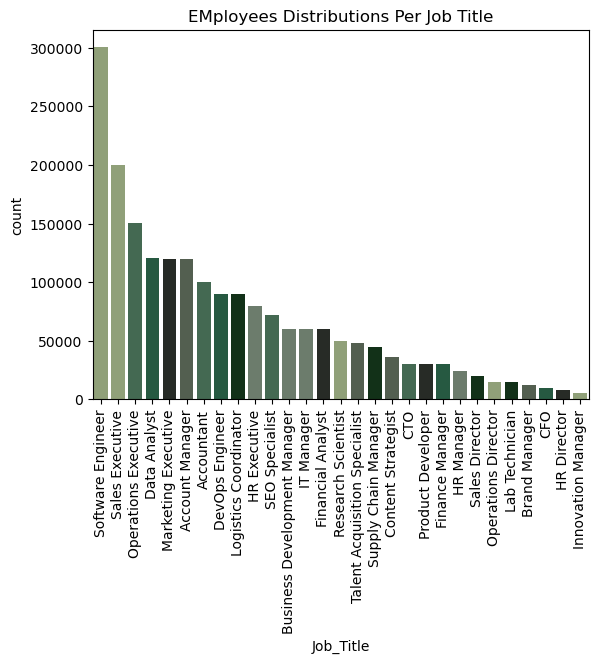

In [77]:
sns.countplot(x='Job_Title',order=orders,
palette=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'],data=data,hue='Job_Title')
plt.title("EMployees Distributions Per Job Title")
plt.xticks(rotation=90)
plt.show()

### What Is The Avrage Salary Per Department

In [9]:
avg_salary=data.groupby('Department').Salary_INR.mean()/1000
sorted_avg_salary=avg_salary.sort_values(ascending=False)

In [ ]:
avg_salary

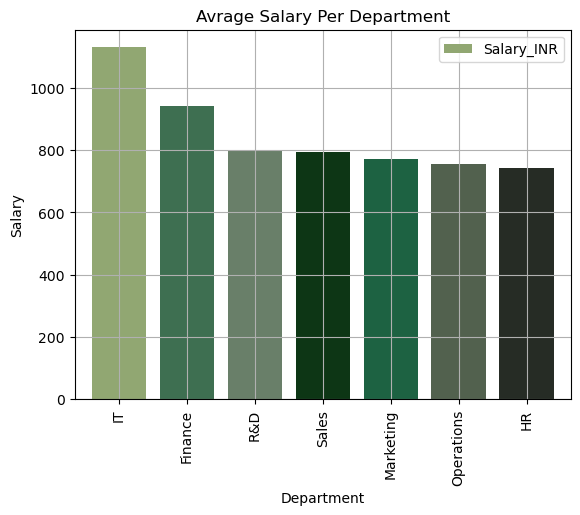

In [11]:

sorted_avg_salary.plot(x=avg_salary.index,y=avg_salary.values,kind='bar',
color=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25']
,legend=True,width=.8)
plt.title("Avrage Salary Per Department")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.grid()
plt.show()

### Which Job Title Has The Most Salary

In [7]:
max_job=data.groupby('Job_Title').Salary_INR.max()/1000
ordered_max_job=max_job.sort_values(ascending=False)

In [8]:
ordered_max_job

Job_Title
IT Manager                       2999.976
Finance Manager                  2499.958
Software Engineer                1799.994
Business Development Manager     1799.983
HR Manager                       1799.839
Financial Analyst                1499.991
CTO                              1199.999
Account Manager                  1199.998
Data Analyst                     1199.997
Marketing Executive              1199.997
Content Strategist               1199.995
Talent Acquisition Specialist    1199.995
Research Scientist               1199.995
Operations Executive             1199.991
DevOps Engineer                  1199.986
Supply Chain Manager             1199.973
Product Developer                1199.950
Lab Technician                   1199.943
CFO                              1199.930
Innovation Manager               1199.896
Sales Director                   1199.877
Brand Manager                    1199.824
HR Director                      1199.823
Operations Director     

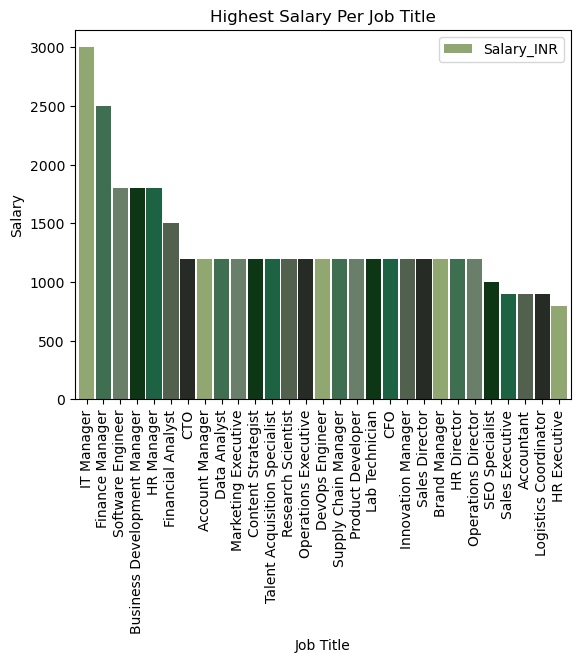

In [12]:
ordered_max_job.plot(x=max_job.index,y=max_job.values,kind='bar',color=['#91a772',
'#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'],legend=True,width=.9)
plt.title("Highest Salary Per Job Title")
plt.xticks(rotation=90)
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.savefig('highest_salary.png')
plt.show()

### What Is The Avrage Salary In Diffrenet Department Based On Job Title

In [115]:
Salary_dep_job=data.groupby(['Department','Job_Title']).Salary_INR.mean()/1000
sorted_salary_dep_job=Salary_dep_job.sort_values(ascending=True)


In [ ]:
sorted_salary_dep_job

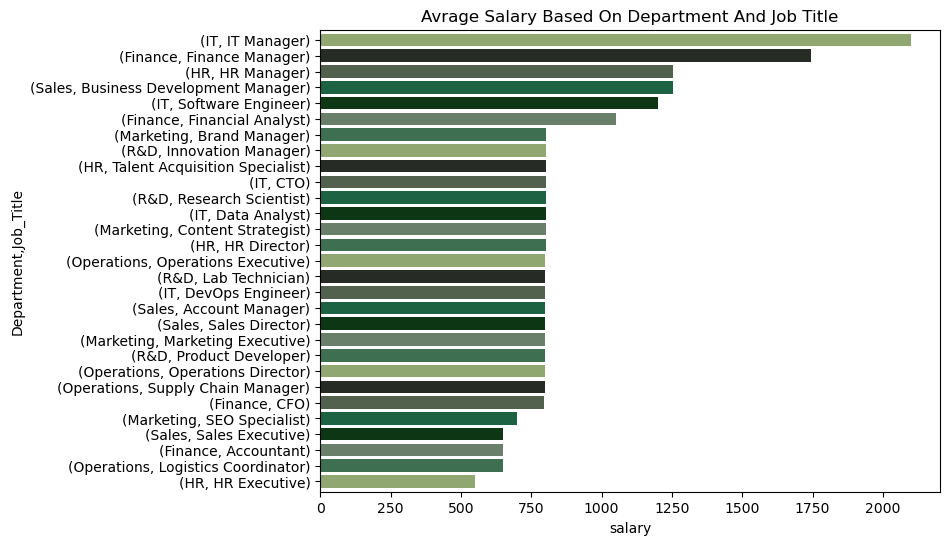

In [118]:
sorted_salary_dep_job.plot(kind='barh',figsize=(8,6),
color=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'],width=.8)
plt.title("Avrage Salary Based On Department And Job Title")
plt.xlabel("salary")
plt.show()

### How Many Employees Resigned  In Each Department

In [120]:
resigned=data[data['Status']=='Resigned']

In [ ]:
resigned

In [129]:
resigned_emp=resigned.groupby('Department').Status.value_counts()

In [130]:
sorted_resigned_emp=resigned_emp.sort_values(ascending=False)

In [ ]:
sorted_resigned_emp

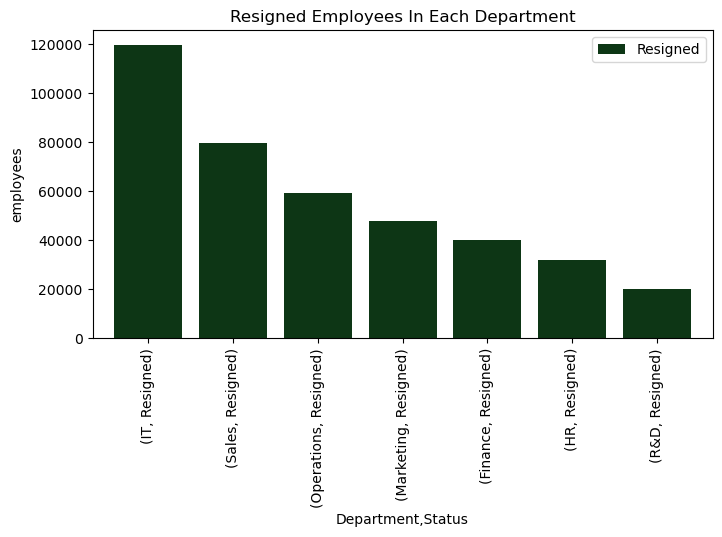

In [158]:
plt.figure(figsize=(8,4))
sorted_resigned_emp.plot(x=resigned_emp.index,y=resigned_emp.values,kind='bar',
width=.8,legend=True,label='Resigned',color=['#0d3615'])
plt.title("Resigned Employees In Each Department")
plt.ylabel("employees")
plt.show()

###  How Many Employees Terminated  In Each Department

In [139]:
Terminated=data[data['Status']=='Terminated']

In [140]:
Terminated_emp=Terminated.groupby('Department').Status.value_counts()

In [141]:
sorted_Terminated_emp=Terminated_emp.sort_values(ascending=False)

In [ ]:
sorted_Terminated_emp

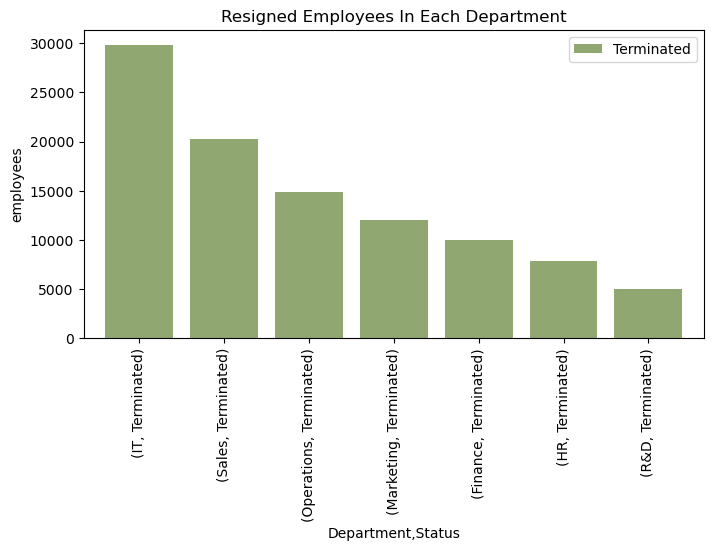

In [157]:
plt.figure(figsize=(8,4))
sorted_Terminated_emp.plot(x=Terminated_emp.index,y=Terminated_emp.values,
kind='bar',width=.8,legend=True,label='Terminated',color=['#91a772'])
plt.title("Resigned Employees In Each Department")

plt.ylabel("employees")
plt.show()

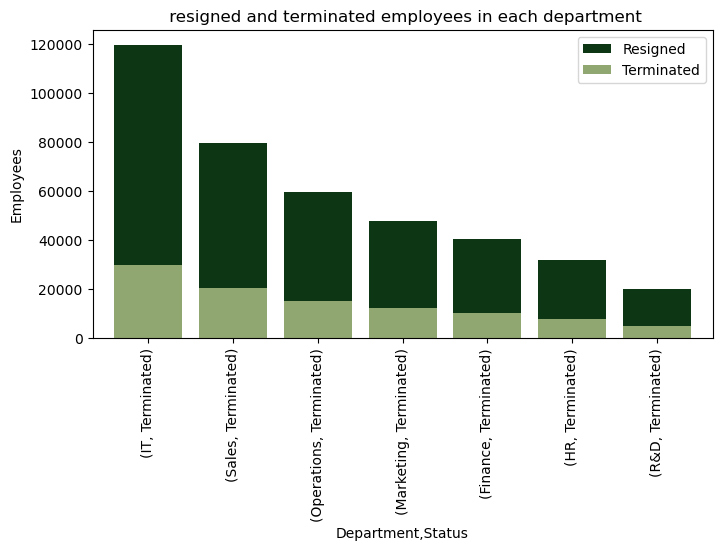

In [156]:
plt.figure(figsize=(8,4))
sorted_resigned_emp.plot(x=resigned_emp.index,y=resigned_emp.values,
kind='bar',width=.8,legend=True,label='Resigned',color=['#0d3615'])
sorted_Terminated_emp.plot(x=Terminated_emp.index,
y=Terminated_emp.values,kind='bar',width=.8,legend=True,label='Terminated',
color=['#91a772'])
plt.title(" resigned and terminated employees in each department")
plt.ylabel("Employees")
plt.show()


### How Does Salary Vary With Years Of Experiences

In [161]:
Experience=data.groupby('Experience_Years').Salary_INR.mean()
sorted_Experience=Experience.sort_values(ascending=True)


In [ ]:
sorted_Experience

### What is the average performance rating by department

In [167]:
performance=data.groupby('Department').Performance_Rating.mean()
sorted_performance=performance.sort_values(ascending=False)



In [ ]:
sorted_performance

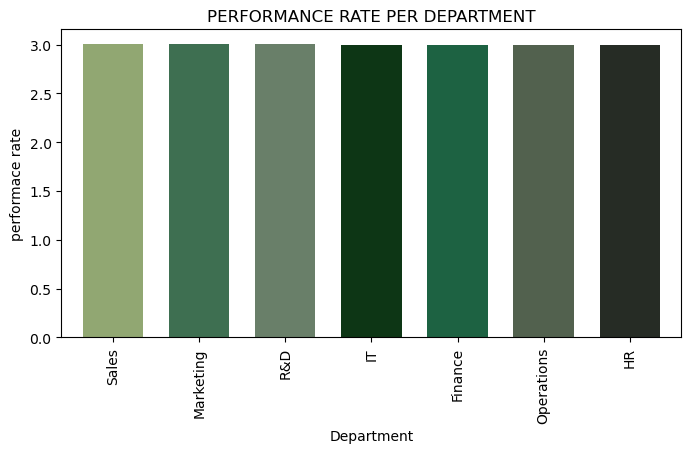

In [171]:
plt.figure(figsize=(8,4))
sorted_performance.plot(x=performance.index,y=performance.values,kind='bar',width=.7,
color=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'])
plt.title("PERFORMANCE RATE PER DEPARTMENT")
plt.ylabel("performace rate")
plt.show()

###  Which Country have the highest concentration of employees

In [26]:
data['Country']=data['Location'].apply(lambda x : str(x.split(',')[1]))

In [ ]:
data

In [28]:
Country_=data.Country.value_counts()

In [29]:
Country_

Country
Congo                     16286
Korea                     16285
Sri Lanka                  8409
Switzerland                8391
British Virgin Islands     8373
                          ...  
Indonesia                  7983
Kazakhstan                 7973
Montenegro                 7972
Bhutan                     7971
Palestinian Territory      7895
Name: count, Length: 243, dtype: int64

### Is there a correlation between performance rating and salary 

In [18]:
data['Performance_Rating'].corr(data['Salary_INR'])

np.float64(-0.00020919799940898918)

In [19]:
data[['Performance_Rating','Salary_INR']].corr()

,Performance_Rating,Salary_INR
Performance_Rating,1.000000,-0.000209
Salary_INR,-0.000209,1.000000


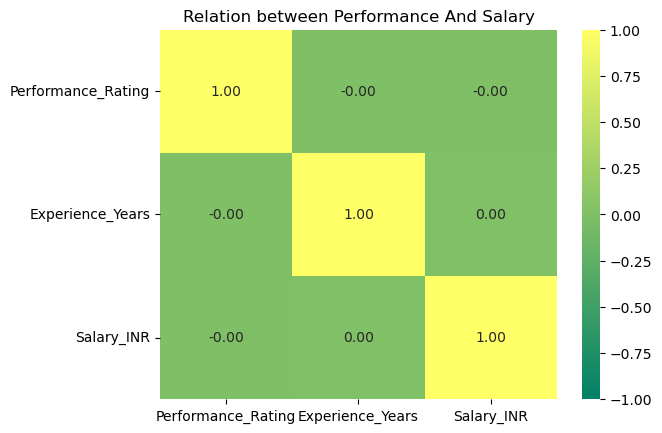

In [25]:
sns.heatmap(data.corr(numeric_only=True),
    annot=True,              
    fmt=".2f",              
       
    cmap="summer",   # winter colormap
    vmin=-1, vmax=1,
    cbar=True )
plt.title("Relation between Performance And Salary")
plt.show()

### How has the number of hires changed over time (per year)

In [39]:
data.insert(5,'year',data['Hire_Date'].dt.year)

In [ ]:
data

In [44]:
hire_year=data.groupby('year').Employee_ID.count()

In [46]:
hire_year_sorted=hire_year.sort_values(ascending=False)

In [47]:
hire_year_sorted

year
2022    201373
2024    200001
2021    199366
2023    198982
2020    175460
2017    160363
2016    160249
2019    160202
2018    159658
2025    122798
2015     85984
2014     40202
2011     40089
2013     39988
2012     39765
2010     15520
Name: Employee_ID, dtype: int64

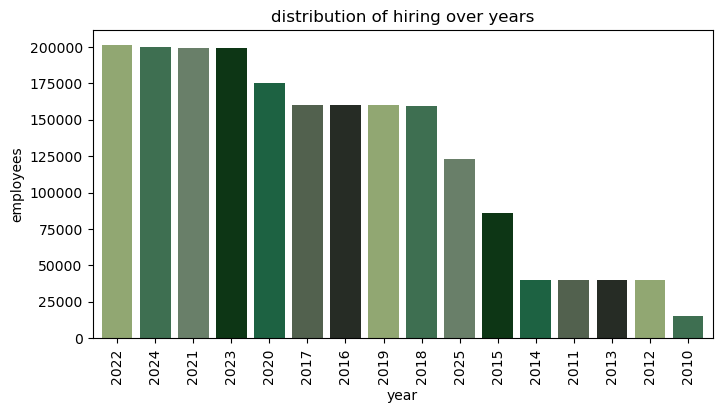

In [49]:
hire_year_sorted.plot(x=hire_year.index,y=hire_year.values,kind='bar',width=.8,
figsize=(8,4),color=['#91a772','#3e6f51','#697f69','#0d3615','#1d6242','#52614e','#262c25'])
plt.title("distribution of hiring over years")
plt.ylabel("employees")
plt.show()

###  Compare salaries of Remote vs. On-site employees — is there a significant difference 

In [51]:
comparsion=data.groupby('Work_Mode').Salary_INR.mean()

In [52]:
comparsion 

Work_Mode
On-site    896835.945792
Remote     896965.326373
Name: Salary_INR, dtype: float64

##### no segnificant diffrence between working from home or on site in terms of salaries

### Find the top 10 employees with the highest salary in each department.

In [ ]:
top10=data.groupby('Department').apply(lambda x: x.nlargest(10,'Salary_INR'))

In [56]:
top10

Employee_ID           Full_Name Department  \
Department                                                      
Finance    888712   EMP0888713   Christopher Sloan    Finance   
           695808   EMP0695809        Todd Rodgers    Finance   
           459273   EMP0459274        Angela Payne    Finance   
           750893   EMP0750894           Nina Lara    Finance   
           780290   EMP0780291   Brittany Thompson    Finance   
...                        ...                 ...        ...   
Sales      86194    EMP0086195    Gabrielle Phelps      Sales   
           1116580  EMP1116581     Kimberly Mullen      Sales   
           1760918  EMP1760919  Christopher Farmer      Sales   
           1878661  EMP1878662    Margaret Gardner      Sales   
           1333220  EMP1333221      Benjamin Jones      Sales   

                                       Job_Title  Hire_Date  year  \
Department                                                          
Finance    888712                Finance Manager 2011-07-19  2011   
           695808                Finance Manager 2019-12-27  2019   
           459273                Finance Manager 2021-08-12  2021   
           750893                Finance Manager 2021-10-19  2021   
           780290                Finance Manager 2021-07-23  2021   
...                                          ...        ...   ...   
Sales      86194    Business Development Manager 2015-11-23  2015   
           1116580  Business Development Manager 2025-01-09  2025   
           1760918  Business Development Manager 2013-01-12  2013   
           1878661  Business Development Manager 2025-04-23  2025   
           1333220  Business Development Manager 2017-11-14  2017   

                                                      Location  \
Department                                                       
Finance    888712                        East Ashley, Portugal   
           695808                          North Taylor, Ghana   
           459273                 South Ravenport, Isle of Man   
           750893            North Christopher, American Samoa   
           780290                 East Melissaside, Martinique   
...                                                        ...   
Sales      86194    New Michaelshire, Central African Republic   
           1116580                          Welchberg, Uruguay   
           1760918                         West Mark, Dominica   
           1878661                         Gentryburgh, Serbia   
           1333220                      East Marissa, Slovenia   

                    Performance_Rating  Experience_Years    Status Work_Mode  \
Department                                                                     
Finance    888712                    1                14    Active   On-site   
           695808                    1                 5    Active   On-site   
           459273                    5                 4    Active    Remote   
           750893                    4                 3    Active   On-site   
           780290                    1                 4    Active   On-site   
...                                ...               ...       ...       ...   
Sales      86194                     4                 9  Resigned    Remote   
           1116580                   3                 0  Resigned   On-site   
           1760918                   4                12   Retired   On-site   
           1878661                   1                 0    Active   On-site   
           1333220                   1                 7  Resigned    Remote   

                    Salary_INR                    Country  
Department                                                 
Finance    888712      2499958                   Portugal  
           695808      2499929                      Ghana  
           459273      2499925                Isle of Man  
           750893      2499813             American Samoa  
           7802

In [ ]:
top10.head(40)

In [ ]:
top10.tail(30)

### Identify departments with the highest attrition rate (Resigned %).

In [63]:
Resigned_emp=data.groupby('Department').Status.agg(total_emp='count',resigned=lambda x:(x=='Resigned').sum())

In [64]:
Resigned_emp

,total_emp,resigned
Department,,
Finance,199873,40238
HR,159119,31736
IT,601042,119852
Marketing,240081,47793
Operations,300095,59397
R&D,99759,19919
Sales,400031,79725
